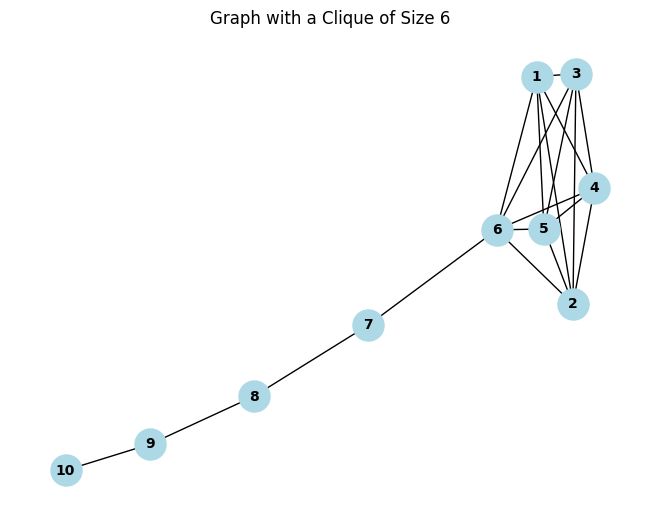

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add 10 vertices
num_vertices = 10
G.add_nodes_from(range(1, num_vertices + 1))

# Add edges forming a chain
for i in range(1, num_vertices):
    G.add_edge(i, i + 1)

# Add edges to form a clique of size 6 (vertices 1 through 6)
clique_vertices = [1, 2, 3, 4, 5, 6]
for i in range(len(clique_vertices)):
    for j in range(i + 1, len(clique_vertices)):
        G.add_edge(clique_vertices[i], clique_vertices[j])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_weight='bold', node_color='lightblue')
plt.title("Graph with a Clique of Size 6")
plt.show()



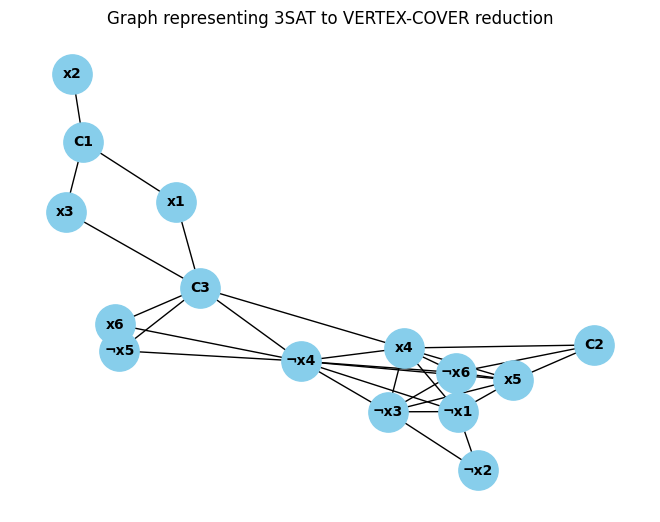

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Vertices representing literals and their negations
literals = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
negations = ['¬x1', '¬x2', '¬x3', '¬x4', '¬x5', '¬x6']
all_vertices = literals + negations

# Vertices for clauses
clause_vertices = ['C1', 'C2', 'C3']

# Add nodes for literals, negations, and clause vertices
G.add_nodes_from(all_vertices)
G.add_nodes_from(clause_vertices)

# Connect clauses to literals
clauses = [
    ('C1', ['x1', 'x2', 'x3']),
    ('C2', ['x4', 'x5', '¬x6']),
    ('C3', ['x1', '¬x4', '¬x5', 'x3', 'x4', 'x6'])
]

for clause, literals in clauses:
    for literal in literals:
        G.add_edge(clause, literal)

# Connect conflicting literals within each clause
conflicting_literals = [
    ('C1', ['¬x1', '¬x2', '¬x3']),
    ('C2', ['¬x4', '¬x5', 'x6']),
    ('C3', ['¬x1', 'x4', 'x5', '¬x3', '¬x4', '¬x6'])
]

for clause, conflicting in conflicting_literals:
    for literal1 in conflicting:
        for literal2 in conflicting:
            if literal1 != literal2:
                G.add_edge(literal1, literal2)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Set seed for consistent layout
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue', font_size=10)
plt.title('Graph representing 3SAT to VERTEX-COVER reduction')
plt.show()
